In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [3]:
df = pd.read_csv('../data/cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

### transform make and model to their respective group means for encoding:


In [5]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,6.0,10.532763,7.075000,0,0,1,0,0,0,1,1,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.0,4.684721,7.128571,0,0,0,0,0,1,1,0,1
19817,4.25,2015.0,67000,21.14,1498.0,103.52,8.0,7.182097,4.454000,0,0,1,0,0,0,1,1,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.0,7.315421,8.096522,0,0,1,0,0,0,1,0,1


### train test split:


In [6]:
from sklearn.model_selection import train_test_split

traindf , testdf = train_test_split(df , test_size = 0.3  , random_state= 1)
df.shape , traindf.shape , testdf.shape

((19820, 18), (13874, 18), (5946, 18))

### scale the data:


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(traindf)
traindf = pd.DataFrame(scaler.transform(traindf) , columns = df.columns)
testdf = pd.DataFrame(scaler.transform(testdf) , columns = df.columns)

xtrain = traindf.drop('selling_price' , axis = 1)
# xtrain = traindf['model'].to_numpy().reshape(-1,1)
ytrain = traindf['selling_price']

xtest = testdf.drop('selling_price' , axis = 1)
# xtest = testdf['model'].to_numpy().reshape(-1,1)
ytest = testdf['selling_price']

### fit the linear regression model:


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(xtrain , ytrain)

LinearRegression()

In [9]:
model.coef_ , model.intercept_

(array([ 0.10852084, -0.25013785, -0.228541  ,  0.07508445,  0.04530473,
        -0.10852084,  0.06244722,  0.86034164, -0.00702006, -0.00703094,
         0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
        -0.01629955, -0.02359347]),
 0.008034481197835452)

In [10]:
model.coef_ , model.intercept_

(array([ 0.10852084, -0.25013785, -0.228541  ,  0.07508445,  0.04530473,
        -0.10852084,  0.06244722,  0.86034164, -0.00702006, -0.00703094,
         0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
        -0.01629955, -0.02359347]),
 0.008034481197835452)

In [11]:
model.score(xtest , ytest)

0.9458843076992296

## Using the statsmodel package:


In [12]:
import statsmodels.api as sm

In [13]:
xsm = sm.add_constant(xtrain)
smodel = sm.OLS(ytrain , xsm)
results = smodel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.511e+04
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:02:00   Log-Likelihood:                 20670.
No. Observations:               13874   AIC:                        -4.131e+04
Df Residuals:                   13857   BIC:                        -4.118e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.323e+11   1.14e+11     -3.807      0.000   -6.55e+11    -2.1e+11
year              4.323e+11   1.14e+11      3.807      0.000     2.1e+11    6.55e+11
km_driven           -0.2502      0.035     -7.104      0.000      -0.319      -0.181
mileage             -0.2308      0.022    -10.457      0.000      -0.274      -0.188
engine               0.0740      0.015      4.958      0.000       0.045       0.103
max_power            0.0462      0.014      3.209      0.001       0.018       0.074
age               4.323e+11   1.14e+11      3.807      0.000     2.1e+11    6.55e+11
make                 0.0632      0.005     13.974      0.000       0.054       0.072
model                0.8595      0.005    169.914      0.000       0.850       0.869
Individual          -0.0071      0.001     -7.126      0.000      -0.009      -0.005
Trustmark Dealer    -0.0070      0.005     -1.458      0.145      -0.016       0.002
Diesel               0.0066      0.004      1.661      0.097      -0.001       0.014
Electric             0.1288      0.024      5.309      0.000       0.081       0.176
LPG                  0.0155      0.009      1.725      0.085      -0.002       0.033
Petrol              -0.0069      0.004     -1.697      0.090      -0.015       0.001
Manual              -0.0038      0.002     -2.450      0.014      -0.007      -0.001
5                   -0.0166      0.004     -3.877      0.000      -0.025      -0.008
>5                  -0.0238      0.005     -5.133      0.000      -0.033      -0.015
==============================================================================
Omnibus:                     2585.410   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56744.804
Skew:                           0.286   Prob(JB):                         0.00
Kurtosis:                      12.891   Cond. No.                     8.40e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.7e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
results.params

const              -4.322929e+11
year                4.322929e+11
km_driven          -2.501606e-01
mileage            -2.307932e-01
engine              7.397779e-02
max_power           4.622896e-02
age                 4.322929e+11
make                6.315547e-02
model               8.595049e-01
Individual         -7.068954e-03
Trustmark Dealer   -7.027925e-03
Diesel              6.568377e-03
Electric            1.288052e-01
LPG                 1.550638e-02
Petrol             -6.893379e-03
Manual             -3.833931e-03
5                  -1.663202e-02
>5                 -2.378719e-02
dtype: float64

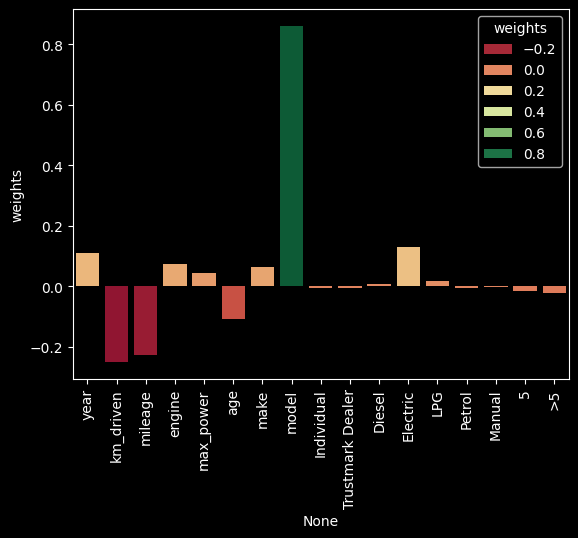

In [15]:
weights = pd.DataFrame(model.coef_ , index = df.columns[1:] , columns = ['weights'])
sns.barplot(weights , x = weights.index  , y = 'weights' , hue = 'weights' , palette = 'RdYlGn')
plt.xticks(rotation = 90)
plt.show()

In [16]:
df.columns[1:].shape

(17,)

<Axes: xlabel='model', ylabel='selling_price'>

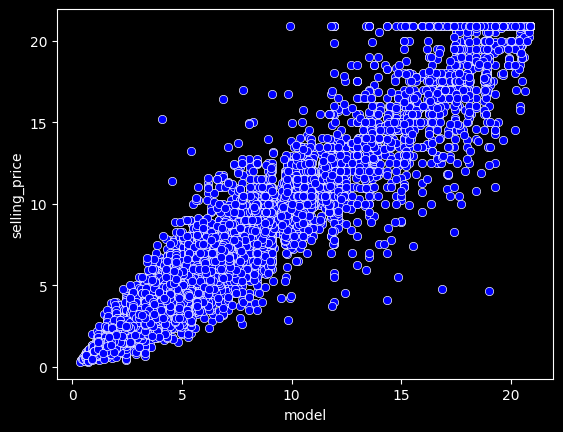

In [31]:
#univariate linear regression:
traindf , testdf = train_test_split(df[['model' , 'selling_price']] , test_size= 0.2)
sns.scatterplot(traindf , x = 'model' , y = 'selling_price' , color = 'blue')

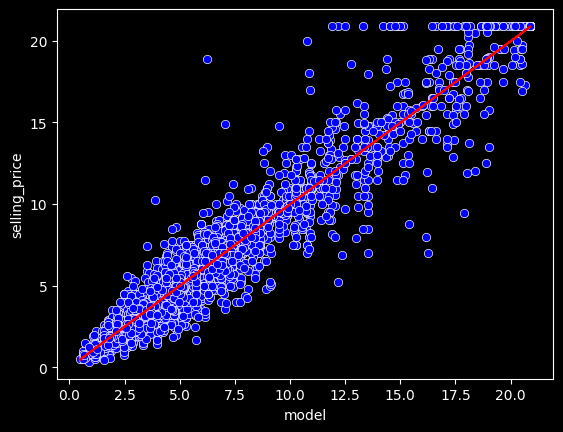

In [41]:
imodel = LinearRegression()
imodel.fit(scaler.fit_transform(traindf[['model']]) , traindf['selling_price'])
yhat = imodel.predict(scaler.transform(testdf[['model']]))
sns.scatterplot(testdf , x = 'model' , y = 'selling_price' , color = 'blue')
plt.plot(testdf['model'] , yhat , color = 'red')